<a href="https://colab.research.google.com/github/Hrithik2212/Disaster-Tweet-Analysis/blob/main/Disaster_Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster Tweet Analysis 

In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=13bd64795eae51f84cb84d75fc13794d5ab46f3fb07956f00b3299ad6955994f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!nvidia-smi

Fri Aug  5 10:36:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import pandas as pd 
import numpy as npp
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-05 10:36:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-05 10:36:42 (79.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Data Wrangling 
#### Source - Kaggle

In [6]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-08-05 10:36:44--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.74.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-08-05 10:36:44 (144 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



Unzipping nlp_getting_started.zip gives the following 3 .csv files:

* sample_submission.csv - an example of the file you'd submit to the Kaggle competition of your model's predictions.
* train.csv - training samples of real and not real diaster Tweets.
* test.csv - testing samples of real and not real diaster Tweets.

## Data Exploration and Cleaning 

In [7]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# Shuffle training dataframe
train_df = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


* 1 = Real Disaster Tweet
* 0 = Not Real Disaster Tweet

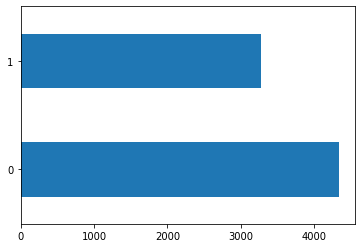

In [9]:
m = train_df.target.value_counts()
m.plot(kind = 'barh')

In [10]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Text(0.5, 1.0, '% of unique values in each col')

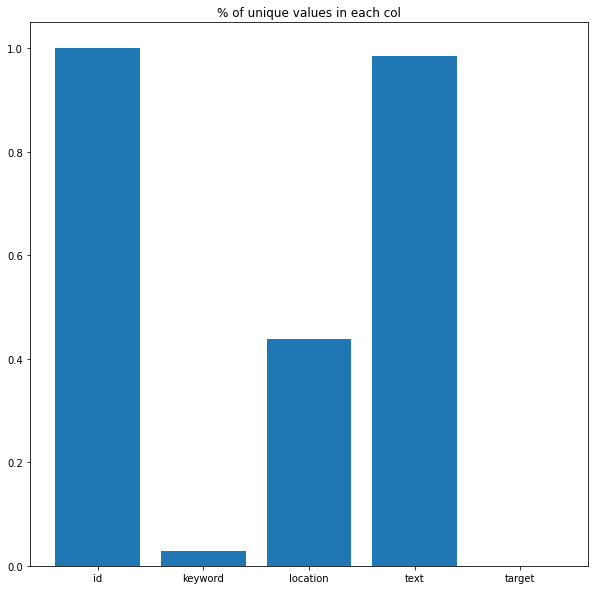

In [11]:
# Visualizing % of unique values in each col
no_of_uni_values_columns=[]
for col in train_df.columns:
    no_of_uni_values_columns.append(len(train_df[col].unique())/len(train_df))
plt.figure(figsize=(10,10))
plt.bar(train_df.columns,no_of_uni_values_columns)
plt.title("% of unique values in each col")

In [12]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [13]:
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
@adorableappple No reported flooding po in the area. Ten-4. #mmda

---

Target: 0 (not real disaster)
Text:
@DelDryden If I press on the twitch will my head explode?

---

Target: 0 (not real disaster)
Text:
Earthquake drill ??????

---

Target: 1 (real disaster)
Text:
Mumbai24x7 Helping Hand: In Mumbai 2 TTEs take charge of helpline to calm anxious relatives - The Ind... http://t.co/tUARYIJpqU #Mumbai

---

Target: 1 (real disaster)
Text:
A [small] flood with bigåÊconsequences https://t.co/CVPdVHxd1R http://t.co/FDMXP4FcMo

---



## Feature Engineering (Text to Numbers)

In NLP, there are two main concepts for turning text into numbers:

* Tokenization - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:

1. Using word-level tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being
2. In this case, every word in a sequence considered a single token.
Character-level tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
3. Sub-word tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.

* Embeddings - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
1. Create your own embedding - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
2. Reuse a pre-learned embedding - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

If you're looking for pre-trained word embeddings, Word2vec embeddings, GloVe embeddings and many of the options available on TensorFlow Hub are great places to start.

### Stop Words Removal

In [15]:
import tensorflow as tf
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

train_df['text'] = tf.strings.regex_replace(train_df['text'], r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*',"")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
train_df['text'][:5]

2644    b'So new weapon cause un-imaginable destruction.'
2227    b'The f$&amp;@ing things I #GISHWHES Just got ...
5448    b'DT @georgegalloway: RT @Galloway4Mayor: \xc2...
132     b'Aftershock back school kick great. I want th...
6845    b'response trauma Children Addicts develop def...
Name: text, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(),
                                                                            train_df["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [18]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [19]:
train_sentences[:10], train_labels[:10]

(array([b'@mogacola @zamtriossu screamed hitting tweet',
        b'Imagine getting flattened Kurt Zouma',
        b'@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        b"@shakjn @C7 @Magnums im shaking fear 'gonna hack planet",
        b'Somehow find I collide http://.co/Ee8RpOahPk',
        b'@EvaHanderek @MarleyKnysh great times bus driver held us hostage mall parking lot lmfao',
        b'destroy free fandom honestly',
        b'Weapons stolen National Guard Armory New Albany still missing #Gunsense http://.co/lKNU8902JE',
        b'@wfaaweather Pete heat wave pass? Is really going mid month? Frisco Boy Scouts canoe trip Okla.',
        b'Patient-reported outcomes long-term survivors metastatic colorectal cancer - British Journal Surgery http://.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]))

### Tokenization 
The TextVectorization layer takes the following parameters:

* **_max_tokens_** - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
* **_standardize_** - Method for standardizing text. Default is "lower_and_strip_punctuation" which lowers text and removes all punctuation marks.
* **_split_** - How to split text, default is "whitespace" which splits on spaces.
* **_ngrams_** - How many words to contain per token split, for example,ngrams=2 splits tokens into continuous sequences of 2.
* **_output_mode_** - How to output tokens, can be "int" (integer mapping), "binary" (one-hot encoding), "count" or "tf-idf". See documentation for more.
* **_output_sequence_length_** - Length of tokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long.
* **_pad_to_max_tokens_** - Defaults to False, if True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than max_tokens. Only valid in certain modes, see docs for more.

In [20]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

11

* The verage Tweet size is 11 and does we will do 20 

In [21]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = 20000,
                                   output_mode= 'int' ,
                                   output_sequence_length=25,
                                   )

In [ ]:
text_vectorizer

In [23]:
text_vectorizer.adapt(train_sentences)

In [24]:
sample_tweet = "Last week the amazon forest was on fire"
text_vectorizer([sample_tweet])

<tf.Tensor: shape=(1, 25), dtype=int64, numpy=
array([[  80,  481,    3, 1245,  124,  788,  131,    7,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0]])>

In [25]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 20000
Top 5 most common words: ['', '[UNK]', 'i', 'the', 'like']
Bottom 5 least common words: ['berlatsky', 'beram0s', 'berahino', 'benzema', 'bentley']


### Create Embedded Layer 

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. 1 = I, 2 = love, 3 = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

The main parameters we're concerned about here are:

* **input_dim** - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
* **output_dim** - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
* **embeddings_initializer** - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* **input_length** - Length of sequences being passed to embedding layer.

In [26]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=20000, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=25, # how long is each input
                             name="embedding_1") 

embedding

In [27]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed


Original text:
b"nside Dragon'belly. Or ice cave volcano Kamchatka | Photography \xc3\xa5\xc2\xa9Daniel Korzhonov\nhttp://.co/8T36HWgoqd"      

Embedded version:


<tf.Tensor: shape=(1, 25, 128), dtype=float32, numpy=
array([[[-0.0279819 , -0.00807878,  0.04520786, ...,  0.00023776,
          0.01473805,  0.03766337],
        [ 0.03231491,  0.03477775, -0.04285641, ..., -0.0138584 ,
         -0.03291193, -0.03539581],
        [-0.00579132, -0.04821959,  0.04538285, ..., -0.03094784,
         -0.04862892,  0.01227155],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

## Model Building and Training 

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

### Model 0 : Naive Bayes

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

Model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("Bayes_Classifier", MultinomialNB()) # model the text
])

In [33]:
Model_0

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Bayes_Classifier', MultinomialNB())])

In [34]:
Model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Bayes_Classifier', MultinomialNB())])

In [37]:
Model_0_score = Model_0.score(val_sentences, val_labels)
print(f"Naive Bayes model achieves an accuracy of: {Model_0_score*100:.2f}%")

Naive Bayes model achieves an accuracy of: 80.31%


### Model 1 : Feed Forward Neural Network with Two Hidden Layers

In [38]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop 

In [64]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
dense1 = layers.Dense(128, activation="relu",
                      kernel_regularizer=tf.keras.regularizers.L1(0.01),
                      activity_regularizer=tf.keras.regularizers.L2(0.01))(x) 
dropout = layers.Dropout(0.5)(dense1)
outputs = layers.Dense(1,activation = 'sigmoid')(dropout) # create the output layer, want binary outputs so use sigmoid activation
Model_1 = tf.keras.Model(inputs, outputs, name="FNN") # construct the model
Model_1.summary()

Model: "FNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 25)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 25, 128)           2560000   
                                                                 
 global_average_pooling1d_6   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0       

In [65]:
Model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [66]:
Model_1_history = Model_1.fit(train_sentences,
                              train_labels,
                              epochs =10,
                              validation_data = (val_sentences ,val_labels),
                              )

Epoch 1/10
215/215 [==============================] - 2s 6ms/step - loss: 3.7179 - accuracy: 0.8505 - val_loss: 0.7547 - val_accuracy: 0.7178
Epoch 2/10
215/215 [==============================] - 1s 5ms/step - loss: 0.6213 - accuracy: 0.9175 - val_loss: 0.7386 - val_accuracy: 0.7769
Epoch 3/10
215/215 [==============================] - 1s 5ms/step - loss: 0.5256 - accuracy: 0.9467 - val_loss: 0.7038 - val_accuracy: 0.7769
Epoch 4/10
215/215 [==============================] - 1s 5ms/step - loss: 0.4671 - accuracy: 0.9501 - val_loss: 0.6875 - val_accuracy: 0.7808
Epoch 5/10
215/215 [==============================] - 1s 5ms/step - loss: 0.4275 - accuracy: 0.9561 - val_loss: 0.6721 - val_accuracy: 0.7795
Epoch 6/10
215/215 [==============================] - 1s 5ms/step - loss: 0.3986 - accuracy: 0.9613 - val_loss: 0.6574 - val_accuracy: 0.7822
Epoch 7/10
215/215 [==============================] - 1s 5ms/step - loss: 0.3726 - accuracy: 0.9635 - val_loss: 0.6583 - val_accuracy: 0.7822
Epoch 

* Model without Dropout(Overfitting) - Train Set 99 % , Test Set 71 % 
* Model with Dropout and with L1 L2 reg - Train Set 97 % , Test Set 78 % 

### Model 2 : Simple RNN 

In [72]:
from keras import initializers

In [113]:
Model_2 = Sequential()
Model_2.add(Input(shape=(1,),dtype='string'))
Model_2.add(text_vectorizer)
Model_2.add(embedding)
Model_2.add(tf.keras.layers.SimpleRNN(24,
                                      kernel_initializer=initializers.RandomNormal(stddev=0.001),
                                      recurrent_initializer=initializers.Identity(gain=1.0)))
Model_2.add(layers.Dropout(0.8))
Model_2.add(Dense(24,activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.L1(0.2),
                  activity_regularizer=tf.keras.regularizers.L2(0.1)))
Model_2.add(Dense(1,activation ='sigmoid'))
Model_2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 25)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     multiple                  2560000   
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 24)                3672      
                                                                 
 dropout_16 (Dropout)        (None, 24)                0         
                                                                 
 dense_33 (Dense)            (None, 24)                600       
                                                                 
 dense_34 (Dense)            (None, 1)                 25        
                                                     

In [114]:
Model_2.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [115]:
Model_2_history = Model_2.fit(train_sentences,
                              train_labels,
                              epochs =5,
                              validation_data = (val_sentences ,val_labels),
                              )

Epoch 1/5
215/215 [==============================] - 7s 29ms/step - loss: 10.8848 - accuracy: 0.9675 - val_loss: 3.6688 - val_accuracy: 0.7205
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 1.2946 - accuracy: 0.9215 - val_loss: 0.7771 - val_accuracy: 0.7218
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.6422 - accuracy: 0.9564 - val_loss: 0.7988 - val_accuracy: 0.7244
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.6006 - accuracy: 0.9740 - val_loss: 0.7957 - val_accuracy: 0.7349
Epoch 5/5
215/215 [==============================] - 6s 27ms/step - loss: 0.5493 - accuracy: 0.9853 - val_loss: 0.8275 - val_accuracy: 0.7231


### Model 3 : LSTM

In [140]:
from tensorflow.keras import regularizers
Model_3 = Sequential()
Model_3.add(Input(shape=(1,),dtype='string'))
Model_3.add(text_vectorizer)
Model_3.add(embedding)
Model_3.add(layers.LSTM(64))
Model_3.add(Dense(64,activation ='relu',
            kernel_regularizer = regularizers.L1(0.1),
            activity_regularizer= regularizers.L2(0.01)))
Model_3.add(Dropout(0.8))
Model_3.add(Dense(1,activation = 'sigmoid'))
Model_3.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 25)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     multiple                  2560000   
                                                                 
 lstm_10 (LSTM)              (None, 64)                49408     
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 1)                 65        
                                                     

In [141]:
Model_3.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [142]:
Model_3_history = Model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5 ,
                              validation_data = (val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 4s 10ms/step - loss: 15.6499 - accuracy: 0.9388 - val_loss: 0.9188 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.6365 - accuracy: 0.9529 - val_loss: 0.8116 - val_accuracy: 0.7533
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.5748 - accuracy: 0.9591 - val_loss: 0.8305 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.5281 - accuracy: 0.9604 - val_loss: 0.8226 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.5208 - accuracy: 0.9534 - val_loss: 0.8528 - val_accuracy: 0.7572


### Model 4 : GRU Model